In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/FUTURE_DS_03/college_event_feedback.csv')
df.head()

,Event_Name,Event_Type,Department,Rating,Feedback_Comment
0,AI & Machine Learning Workshop,Workshop,CSE,5,Very informative and hands-on session. Loved t...
1,AI & Machine Learning Workshop,Workshop,CSE,4,Good content but could include more practical ...
2,Cyber Security Seminar,Seminar,ISE,3,Session was okay but too theoretical.
3,Cyber Security Seminar,Seminar,ISE,2,Speaker was not engaging and session felt long.
4,Annual Cultural Fest,Cultural,All,5,Amazing performances and great energy througho...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Event_Name        20 non-null     object
 1   Event_Type        20 non-null     object
 2   Department        20 non-null     object
 3   Rating            20 non-null     int64 
 4   Feedback_Comment  20 non-null     object
dtypes: int64(1), object(4)
memory usage: 932.0+ bytes


In [11]:
df.describe()

,Rating
count,20.000000
mean,4.050000
std,0.998683
min,2.000000
25%,3.750000
50%,4.000000
75%,5.000000
max,5.000000


/tmp/ipython-input-821810866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='cool')


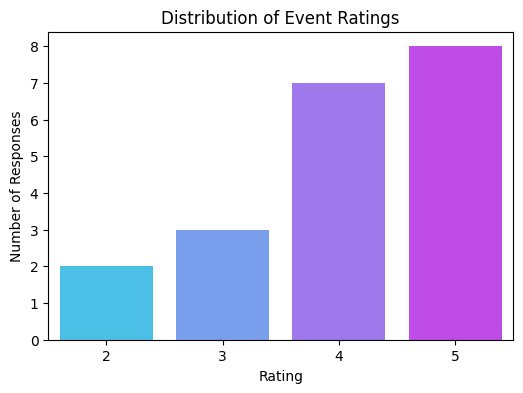

In [27]:
#countplot for distribution of event ratings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df, palette='cool')
plt.title('Distribution of Event Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Responses')
plt.show()

/tmp/ipython-input-379044952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Event_Type', y='Rating', data=df, palette='Set2')


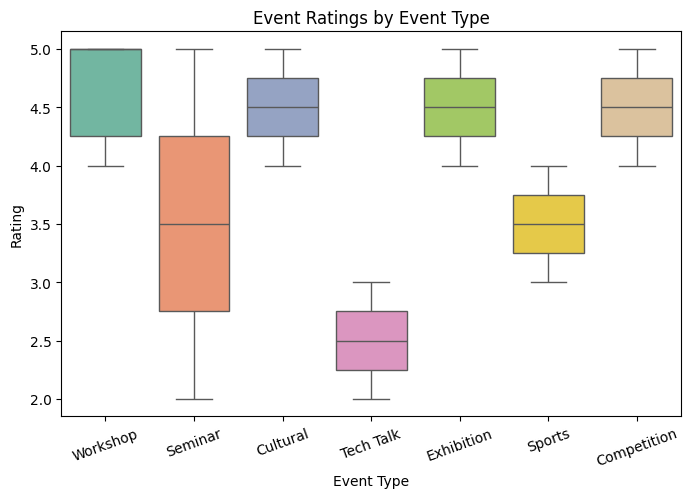

In [29]:
#box plot for event ratings by event type
plt.figure(figsize=(8,5))
sns.boxplot(x='Event_Type', y='Rating', data=df, palette='Set2')
plt.title('Event Ratings by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Rating')
plt.xticks(rotation=20)
plt.show()

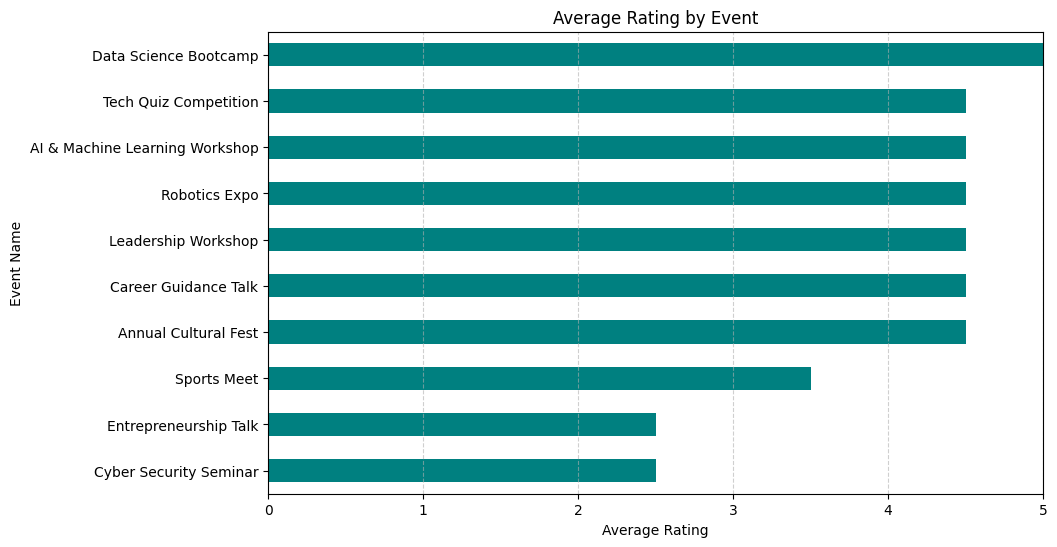

In [30]:
# Horizontal bar chart for average rating by event
avg_rating = df.groupby('Event_Name')['Rating'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_rating.plot(kind='barh', color='teal')
plt.title('Average Rating by Event')
plt.xlabel('Average Rating')
plt.ylabel('Event Name')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

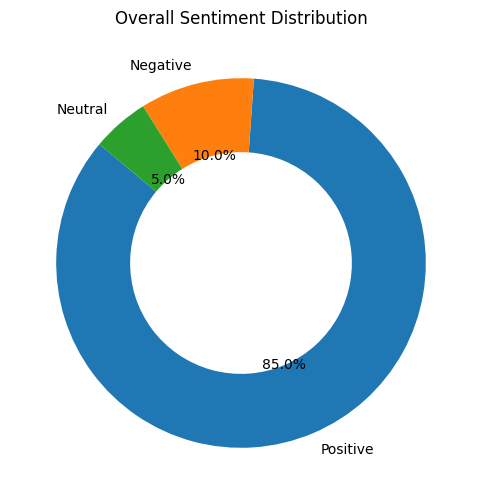

In [31]:
#Donut chart on overall sentiment distribution on how do students feel
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width':0.4}
)
plt.title('Overall Sentiment Distribution')
plt.show()

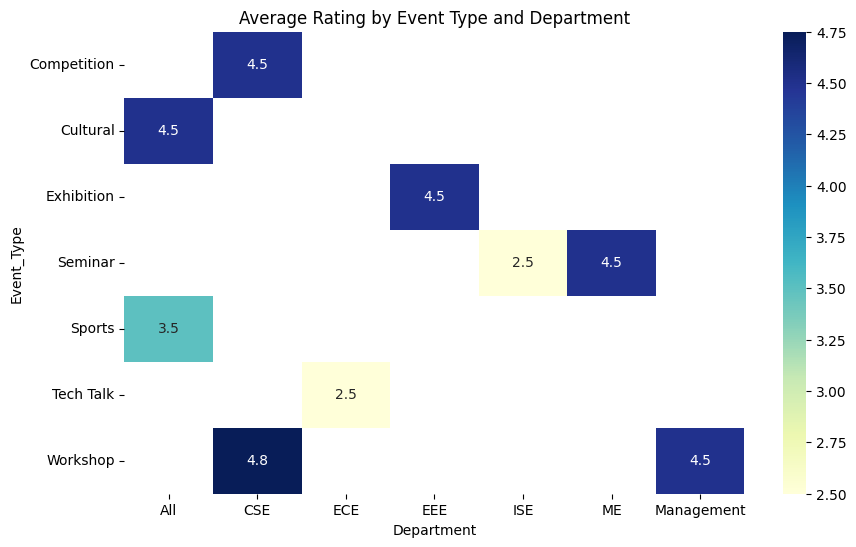

In [34]:
#heatmap of average rating by event type and department
pivot_table = df.pivot_table(
    values='Rating',
    index='Event_Type',
    columns='Department',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Average Rating by Event Type and Department')
plt.show()

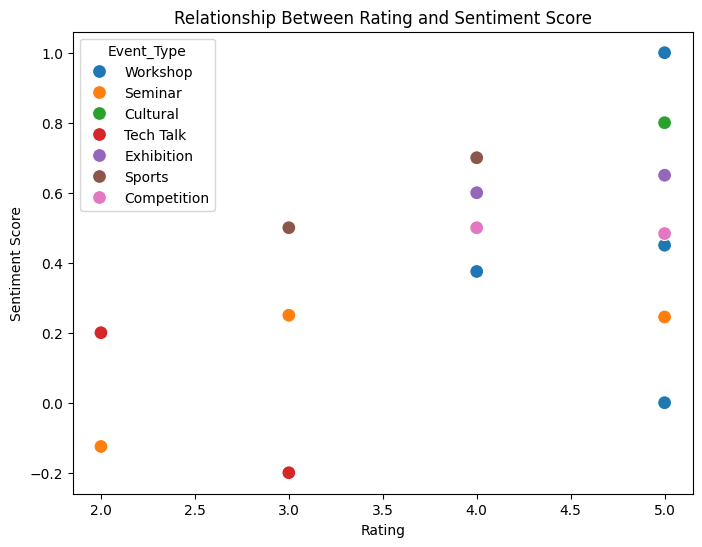

In [36]:
#scatter plot to show the relationship between rating and sentiment score
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Rating',
    y='Sentiment_Score',
    hue='Event_Type',
    data=df,
    s=100
)
plt.title('Relationship Between Rating and Sentiment Score')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()


In [9]:
!pip install textblob

In [15]:
from textblob import TextBlob

In [16]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Sentiment_Score'] = df['Feedback_Comment'].apply(get_sentiment)

df[['Feedback_Comment', 'Sentiment_Score']].head()

,Feedback_Comment,Sentiment_Score
0,Very informative and hands-on session. Loved t...,0.450
1,Good content but could include more practical ...,0.600
2,Session was okay but too theoretical.,0.250
3,Speaker was not engaging and session felt long.,-0.125
4,Amazing performances and great energy througho...,0.800


In [18]:
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Score'].apply(sentiment_label)

df[['Feedback_Comment', 'Sentiment']].head()


,Feedback_Comment,Sentiment
0,Very informative and hands-on session. Loved t...,Positive
1,Good content but could include more practical ...,Positive
2,Session was okay but too theoretical.,Positive
3,Speaker was not engaging and session felt long.,Negative
4,Amazing performances and great energy througho...,Positive


/tmp/ipython-input-1155158528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


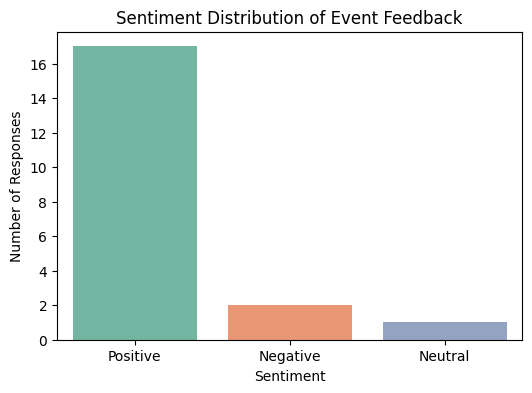

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution of Event Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Responses')
plt.show()

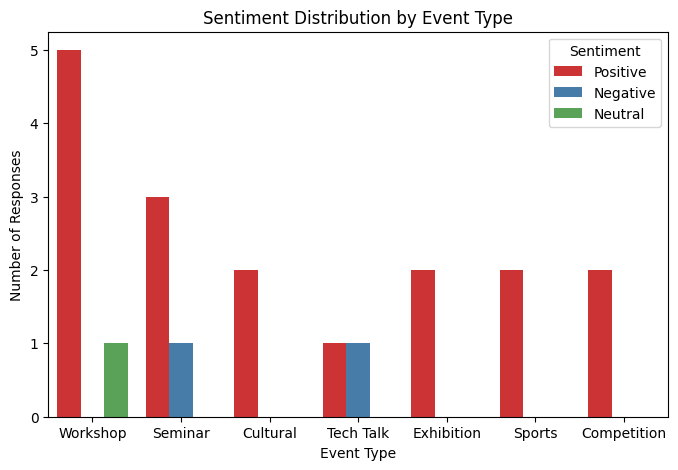

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Event_Type', hue='Sentiment', data=df, palette='Set1')
plt.title('Sentiment Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Responses')
plt.xticks()
plt.show()

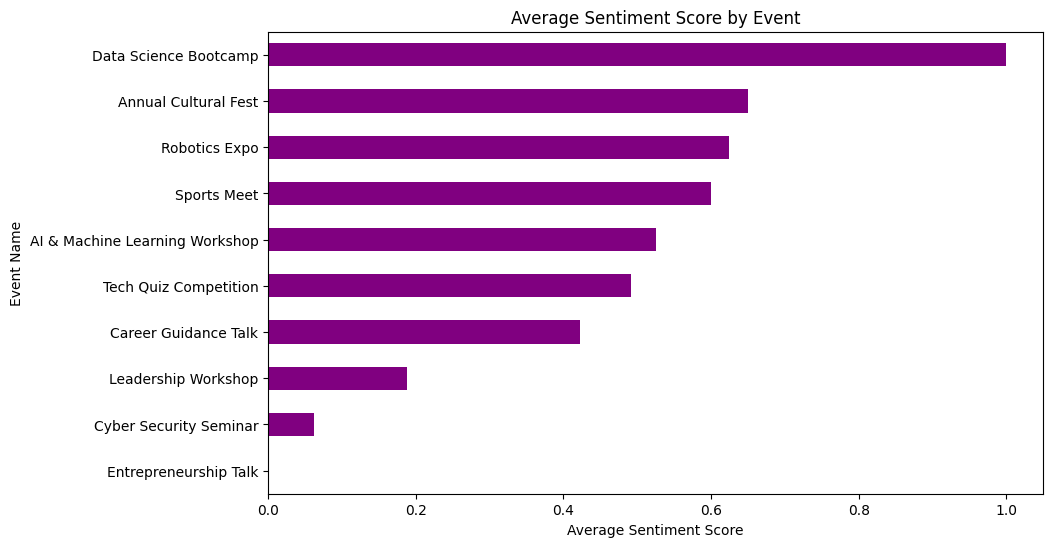

In [23]:
avg_sentiment = df.groupby('Event_Name')['Sentiment_Score'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_sentiment.plot(kind='barh', color='purple')
plt.title('Average Sentiment Score by Event')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Event Name')
plt.show()

In [24]:
!pip install wordcloud

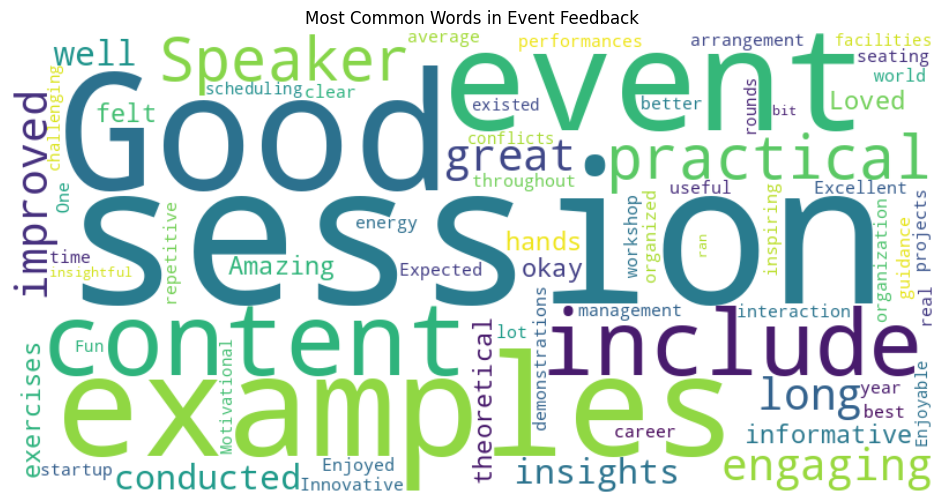

In [25]:
from wordcloud import WordCloud

text = " ".join(df['Feedback_Comment'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Event Feedback')
plt.show()

## Key Insights from Analysis

- Overall feedback sentiment is largely **positive**, indicating successful event planning.
- **Workshops and competitions** received the highest average ratings and sentiment scores.
- **Cyber Security Seminar and Entrepreneurship Talk** show relatively lower satisfaction, suggesting scope for improvement.
- Students frequently mentioned words like *informative*, *engaging*, *hands-on*, and *well-organized*.
- Negative feedback mainly relates to **time management**, **speaker engagement**, and **practical exposure**.


## Recommendations for Future Events

- Increase the number of **hands-on workshops** and interactive sessions.
- Improve **speaker engagement** for seminars by including Q&A or live demos.
- Enhance logistics such as **time management and seating arrangements**.
- Collect more structured feedback to further refine event quality.


### Conclusion

This project demonstrates how survey feedback combined with sentiment analysis
can uncover meaningful insights into student experiences. By analyzing both
quantitative ratings and qualitative comments, event organizers can make
data-driven decisions to improve future campus events.
